In [2]:
# Permet de tout executer au lancement du notebook + conserver le notebook actif pendant 2h
from IPython.display import Javascript
import sys
if ".." not in sys.path:
    sys.path.append("..")
from masquer import *
Javascript("""
function repeter(){
IPython.notebook.kernel.execute("a=1");
}
// execute a = 1 en python toutes les 8 minutes pendant 2h
let timerId = setInterval(() => repeter(), 4800);
setTimeout(() => { clearInterval(timerId); alert('fin de cession'); }, 7200000);

// Supprimer la taille limite pour la sortie d'une cellule
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
};
IPython.notebook.kernel.execute("url = '" + window.location + "'");

// Exécuter toutes les cellule du notebook
    require(
        ['base/js/namespace', 'jquery'], 
        function(jupyter, $) {
            
                
                jupyter.actions.call('jupyter-notebook:run-all-cells-below');
                jupyter.actions.call('jupyter-notebook:save-notebook');
                Jupyter.actions.call('jupyter-notebook:hide-header')

        }
    );""")

<IPython.core.display.Javascript object>

In [3]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
HTML("""<style>
h1 {
  font-family: 'Permanent Marker', cursive;
  text-align: center;
  color: red;
  
}
ol {
  list-style-position: inside;
  margin-left: 1em;
  list-style-position: outside;
}
h2 {
  font-family: 'Permanent Marker', cursive;
  color: blue;
}
h3 {
  font-family: 'Permanent Marker', cursive;

}
</style>""")

# CHAPITRE 8 - Bases de données

Ce cours est une version "notebook" du cours proposé par Van Zuijlen Stéphan [ici](https://isn-icn-ljm.pagesperso-orange.fr/NSI-TLE/co/section_chapitre5.html)

## Introduction

L'informatique peut se concevoir comme la science du traitement automatique des données.  
  
Pour que ce traitement soit efficace, il est nécessaire que les données soient structurées.  
  
Jusqu'à présent, nous avons essentiellement utilisé des structures de données comme des tableaux, des dictionnaires, qui supposent l'existence d'un ordre permettant le classement de l'information.  
  
Un tel classement présente des limites car d'autres critères peuvent être pertinents et ranger ces données dans un tableau exige d'en privilégier certains au détriments d'autres.  
  
Par exemple les bibliothèques publiques utilisent un système de classification inventé au XIXème siècle : la classification décimale de DEWEY.  
  
Les documents sont répartis en 10 classes, chaque classe est divisée en 10 divisions, chaque division en 10 subdivisions, et ainsi de suite.  
  
Cette classification permet depuis bientôt 150 ans de ranger nos bibliothèques, mais n'en présente pas moins de nombreux défauts: l'information est hiérarchisée suivant des critères qui étaient pertinents au moment de l'élaboration de ce système mais qui ne le sont plus forcément aujourd'hui mais surtout, si elle facilite le travail du classificateur, elle ne contribue pas à faciliter la tâche du chercheur, à moins que ce dernier ne sache très précisément à quelle discipline rattacher l'objet de sa recherche.  
  
Les logiciels de gestion des livres numériques gèrent sans peine des milliers de références en autorisant des recherches multi-critères (et multi-bibliothèques) sans qu'il soit nécessaire pour l'utilisateur de connaître la structuration interne des données.  
  
Ces outils informatiques utilisent tous des **bases de données relationnelles (BDR)** qui offrent un moyen d'organiser efficacement les données et de les manipuler grâce à des requêtes.  
  
Schématiquement, une base de données est un ensemble de **tables** contenant des données reliées entre elles par des **relations**; on y extrait de l'information par le biais de **requêtes** exprimées dans un langage spécifique.

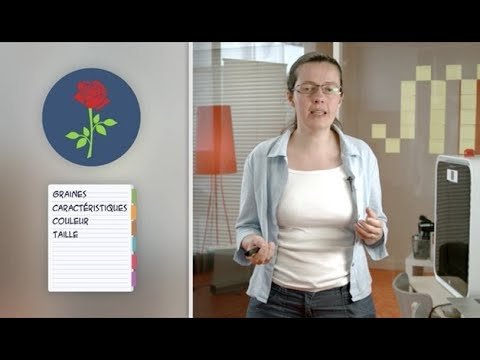

In [4]:
from IPython.display import YouTubeVideo
YouTubeVideo("iu8z5QtDQhY",width="640px", height="480px")

## I. Base de données

Une base de données est un ensemble structuré d'informations.

* Dans le langage courant, elle peut désigner n'importe quelle source importante d'informations (dictionnaires, encyclopédies, etc.)

* En informatique, il s'agit d'informations stockées sous forme de fichiers et organisées de façon à être facilement manipulées.

Prenons par exemple ce tableau qui contient quelques informations sur des ouvrages...
![livres](livres_cours8.png)
On peut l'imaginer comme un extrait d'une plus vaste collection d'informations...

### Vocabulaire

Cette **table** est une **relation** composée de:
* un **en-tête** (libellés des attributs)
* un **corps** qui est composé lui même de:
    * **n-uplets** (ou tuples) pour chaque ligne
    * **attributs** pour les colonnes

![table1](table1_cours8.png)

#### Rq:
Visuellement cette **table** est un tableau qui met en **relation** des données.  
  
* un **n-uplet** contient des éléments. Par exemple: (10, Les Robots, Azimov, 1950, 10)
* un **attribut** contient des éléments. Par exemple, l'attribut ***auteur*** contient (Orwell, Herbert, ....)

#### Important:
Pour chaque attribut d'une relation, il faut définir un **domaine**.
* Le domaine d'un attribut est l'ensemble (fini ou pas) des valeurs possibles (entiers, flottants, chaînes de caractères, dates, ...).

Par exemple, le domaine de l'attribut ***note*** est ***l'ensemble des entiers positifs***  
celui de l'attribut ***auteur*** est ***l'ensemble des chaînes de caractères***  
Il faut donc rendre impossible l'entrée d'une note non entière lors de la création d'un **n-uplet**

### Unicité d'un n-uplet (Fondamental)

Dans une relation, deux n-uplets identiques sont non autorisés.  
  
Dans une relation, il faut pouvoir ***identifier de façon unique un n-uplet.***  
  
Il faut déterminer, parmi les attributs, lequel permet d'identifier de manière unique un n-uplet.  
  
Cet attribut sera considéré comme la **clé primaire** de la relation.  
  
Dans notre exemple :

* L'attribut ***note** ne peut pas jouer le rôle de clé primaire ( deux ouvrages pouvant avoir la même note)
  
* De même pour les attributs ***auteurs*** et ***ann_publi*** et ***titre***.
  
* Il reste donc l'attribut **"id"** ( pour identifiant), qui a été ajouté ici pour jouer le rôle de clé primaire.
  
#### Rq:
ici, nous avons créé artificiellement une clé primaire, car aucun des autres attributs ne pouvait convenir. (ce n'est pas toujours le cas)

![livres](livres_cours8.png)

### Redondance de l'information (Attention!)

En y regardant de plus près, un certains nombre d'informations apparaissent plusieurs fois...

Par exemple : l'auteur "Azimov" apparaît 3 fois dans la table LIVRES ci-dessous.
![livres](livres_cours8.png)

Dans une base de donnée, on évite autant que possible la ***redondance d'informations.***
  
Pour cela, on crée une autre relation AUTEURS que l'on lie avec la relation LIVRES.  
![livres2](livres2_cours8.png)

On a rajouté quelques informations supplémentaires sur les auteurs dans la relation AUTEURS.

### Clé pirmaire - clé étrangère (Fondamental)

Dans la relation AUTEURS, chaque auteur est identifié par l'attribut ***"id"***(clé primaire de la relation)
  
* Dans la relation LIVRES, on a rajouté un attribut ***"id_auteur"*** qui est **la clé primaire** de la relation AUTEURS.
  
* L'attribut ***"id_auteur"** est ce que l'on nomme une **clé étrangère** de la relation LIVRES, elle permet de faire le lien entre les deux relations.
  
#### Rq:
il peut y avoir plusieurs clés étrangères dans une relation.
  
![bdd](bdd_cours8.png)
***Nous venons ainsi de définir les contours d'une base de données relationnelle.***

### Schéma relationnel

On appelle schéma relationnel l'ensemble des relations présentes dans une base de données.
  
c'est à dire qu'il faut fournir :

* les noms des relations
  
* la liste des attributs et de leurs domaines
  
* la clé primaire (on la souligne)
  
* les clés étrangères (précédées d'un #)
  
Pour notre exemple cela donne :
  
**LIVRES** ( <u>id</u> :entiers positifs , titre : str , #id_auteur : entiers positifs, ann_publi : entiers positifs , note : entiers positifs)  
  
**AUTEURS** ( <u>id</u> :entiers positifs , nom : str, prenom : str , ann_naissance : entiers positifs , langue_ecriture : str )
  
Ce qui peut aussi se représenter avec ce schéma :

![schema relationnel](bdd2_cours8.png)